In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import math


In [3]:
img = Image.open('/content/5.1.11.tiff')
img2 = Image.open('/content/5.1.10.tiff')
img3 = Image.open('/content/5.1.12.tiff')


In [4]:
img = np.asarray(img)
img2 = np.asarray(img2)
img3 = np.asarray(img3)

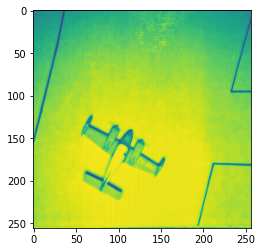

In [4]:
plt.imshow(img)

1. Periodic Convolution

In [ ]:
def flip(img):
  M,N = img.shape
  if M%2 != 0:
    M1 = int((M-1)/2)
  else:
    M1 = int(M/2)
  img1 = np.zeros(img.shape)
  for i in range(M1):
    list_1 = img[i,:]
    img1[i,:] = img[M-i-1,:]
    img1[M-i-1,:] = list_1
  if N%2 != 0:
    N1 = int((N-1)/2)
  else:
    N1 = int(N/2)
  img2 = img1.copy()
  for j in range(N1):
    list_2 = img1[:,j]
    img2[:,j] = img1[:,N-j-1]
    img2[:,N-j-1] = list_2

  return img2




In [ ]:

#Circular convolution

def circular_convolve(img,filter):
  M,N = img.shape
  filter1 = flip(filter)
  img1 = np.zeros(img.shape)
  for i in range(M):
    for j in range(N):
      sum_convolve = 0
      for m in range(M):
        for n in range(N):
          sum_convolve+= img[m,n]*filter1[(i-m)%M,(j-n)%N]
      img1[i,j] = sum_convolve
  return img1

In [ ]:
filter = np.ones((5,5))*1/25

In [ ]:
#1. Circular convolution using average filter
filter_img = np.zeros(img[100:150,0:50].shape)
# M,N = img[:50,:50].shape
filter_img[0:5,0:5] = filter
filter_img[0:5,-5:] = filter
filter_img[-5:,0:5] = filter
filter_img[-5:,-5:] = filter

In [ ]:
filter_img.shape

(50, 50)

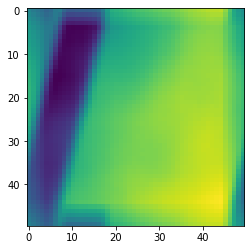

In [ ]:
plt.imshow(circular_convolve(img[100:150,0:50],filter_img))

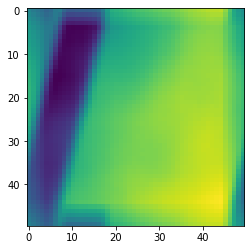

In [ ]:
img_fft = np.fft.fft2(img[100:150,0:50])
filter_fft = np.fft.fft2(filter_img)
img_idft = np.fft.ifft2(img_fft*filter_fft)
plt.imshow(np.real(img_idft))

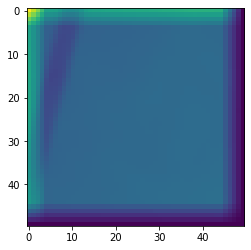

In [ ]:
#Linear convolution using circular convolution
img_padded = np.zeros((filter_img.shape[0]*2,filter_img.shape[1]*2))
filter_padded = np.zeros((filter_img.shape[0]*2,filter_img.shape[1]*2))
img_padded[0:filter_img.shape[0],0:filter_img.shape[1]] = img[100:150,0:50]
filter_padded[0:filter_img.shape[0],0:filter_img.shape[1]] = filter_img
# img_out = circular_convolve(img_padded,filter_padded)


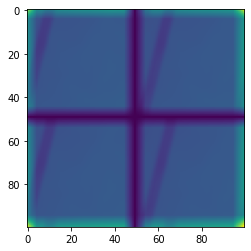

In [ ]:
plt.imshow(img_out)

In [ ]:
def DFT(img):
  dft_arr = np.zeros(img.shape,dtype='complex')
  M,N = img.shape

  for i in range(M):
    for j in range(N):
      sum_value = 0
      for k in range(M):
        for l in range(N):
          e = np.exp(-(2j*np.pi*((k/M)*i + (l/N)*j)))
          sum_value += e*img[k,l]
      dft_arr[i,j] = sum_value
  return dft_arr
def IDFT(img):
  idft = np.zeros(img.shape,dtype='complex')
  M,N = img.shape
  for i in range(M):
    for j in range(N):
      sum_value = 0
      for k in range(M):
        for l in range(N):
          e = np.exp((2j*np.pi*((k/M)*i + (l/N)*j)))
          sum_value += e*img[k,l]
      idft[i,j] = sum_value/M*N
  return idft




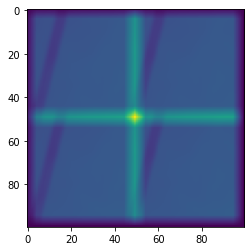

In [ ]:
# img_fft = DFT(img_padded)
# filter_fft = DFT(filter_padded)
img_idft = IDFT(img_fft*filter_fft)
plt.imshow(np.real(img_idft))

2. Image Denoising using Linear Filters

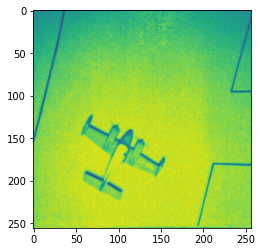

In [ ]:
#Adding gaussian noise to the image
mean = 0
sigma = 5
gaussian = np.random.normal(mean,sigma,(img.shape))

noise_image = img + gaussian

plt.imshow(noise_image)

In [ ]:
def pad_image(img,size):
  M,N = img.shape
  pad_img = np.zeros((M+size-1,N+size-1))
  pad_img[int((size-1)/2):int(M+size-1-(size-1)/2),int((size-1)/2):int(N+size-1-(size-1)/2)] = img
  return pad_img

In [ ]:
img[0:256,:].shape

(256, 256)

In [ ]:
def average_img(img,window_size):
  img1 = pad_image(img,window_size)
  scale = int((window_size-1)/2)
  img2 = np.zeros(img.shape)
  filter = np.ones((window_size,window_size))*(1/window_size**2)
  for i in range(scale,img1.shape[0]-scale):
    for j in range(scale,img1.shape[1]-scale):
      sum_filter = 0
      for m in range(window_size):
        for n in range(window_size):
          sum_filter += img1[i-scale+m,j-scale+n]*filter[m,n]
      img2[i-scale,j-scale] = sum_filter

  return img2

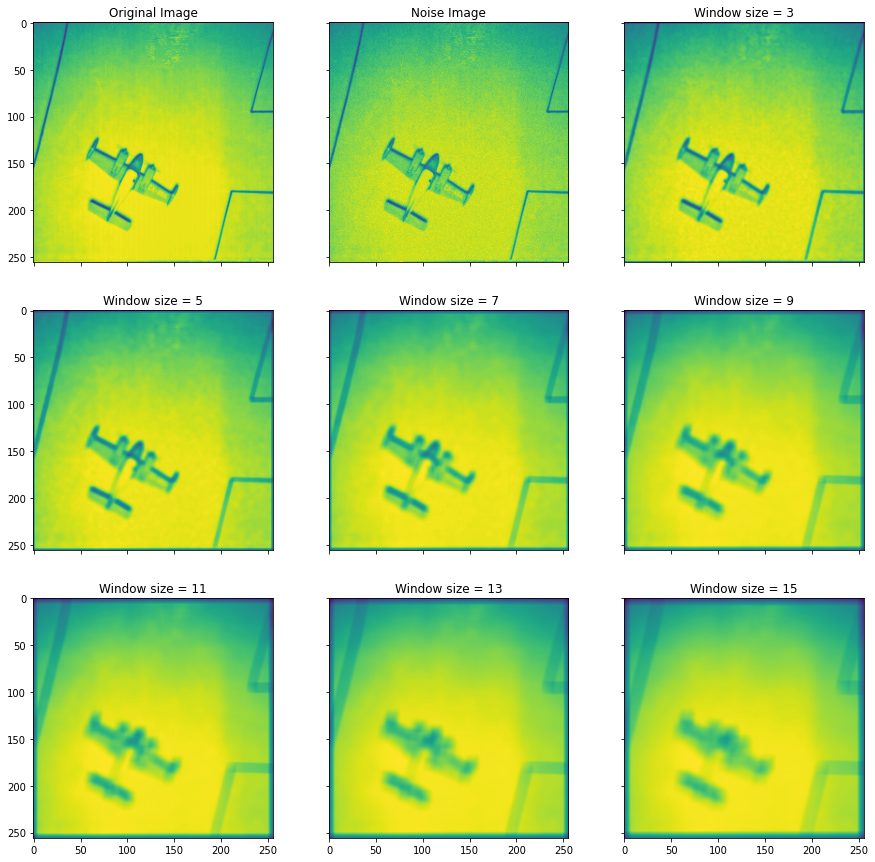

In [ ]:
fig,ax = plt.subplots(3,3,sharex=True,sharey=True,figsize=(15,15))
for i in range(2,9):
  window_size = 2*(i-1) + 1
  img2 = average_img(noise_image,window_size)
  count1 = i//3
  count2 = i%3
  ax[count1,count2].set_title("Window size = {}".format(window_size))
  ax[count1,count2].imshow(img2)
ax[0,0].set_title('Original Image')
ax[0,0].imshow(img)
ax[0,1].set_title('Noise Image')
ax[0,1].imshow(noise_image)

plt.show()

Window size of 3 looks to be the tradeoff size

In [ ]:
#Gaussian filter
def gaussian_img(img,deviation):
  window_size = 5
  img1 = pad_image(img,window_size)
  scale = int((window_size-1)/2)
  img2 = np.zeros(img.shape)
  filter = np.random.normal(0,deviation,(window_size,window_size))
  for i in range(scale,img1.shape[0]-scale):
    for j in range(scale,img1.shape[1]-scale):
      sum_filter = 0
      for m in range(window_size):
        for n in range(window_size):
          sum_filter += img1[i-scale+m,j-scale+n]*filter[m,n]
      img2[i-scale,j-scale] = sum_filter
  return img2

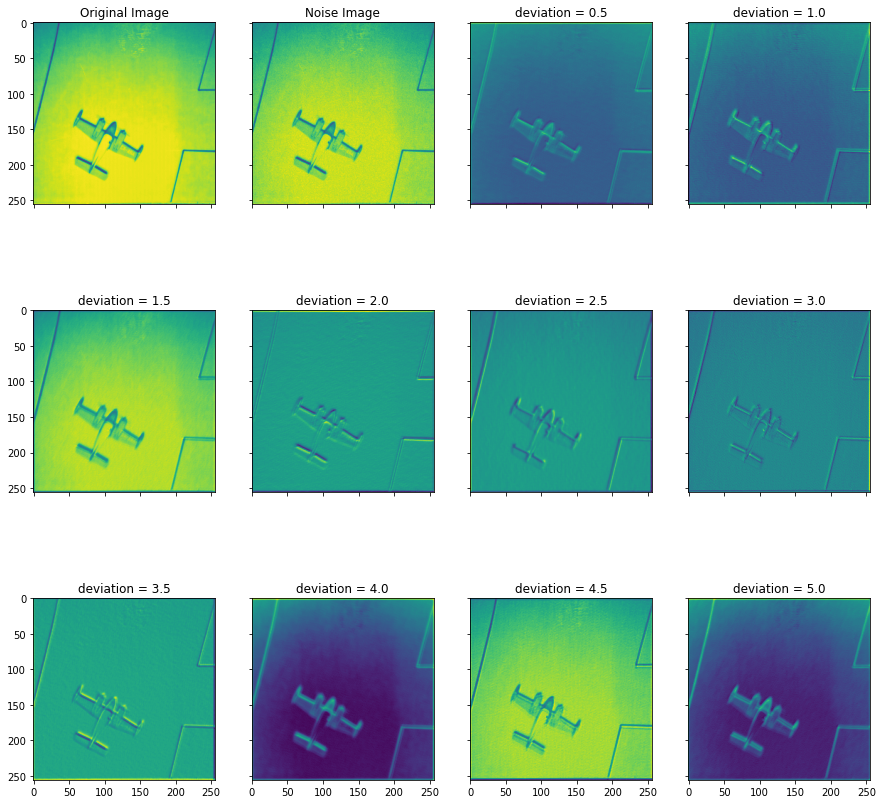

In [ ]:
fig,ax = plt.subplots(3,4,sharex=True,sharey=True,figsize=(15,15))
for i in range(2,12):
  deviation = 0.5*(i-1)
  img2 = gaussian_img(noise_image,deviation)
  count1 = i//4
  count2 = i%4
  ax[count1,count2].set_title("deviation = {}".format(deviation))
  ax[count1,count2].imshow(img2)
ax[0,0].set_title('Original Image')
ax[0,0].imshow(img)
ax[0,1].set_title('Noise Image')
ax[0,1].imshow(noise_image)

plt.show()

3. Image Quality Assessment

In [86]:
def MSE(img1,img2):
  M,N = img1.shape
  sum_msme = 0
  for i in range(M):
    for j in range(N):
      sum_msme += (img1[i,j]-img2[i,j])**2
  return (sum_msme)/(M*N)

def PSNR(img1,img2,Msme=None):
  if Msme:
    psnr = 10*np.log10(255**2/Msme)
    return psnr
  else:
    psnr = 10*np.log10(255**2/MSE(img1,img2))
    return psnr





In [ ]:
msme = MSE(img,img2)

<ipython-input-4-5bcf803ab042>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum_msme += (img1[i,j]-img2[i,j])**2


In [ ]:
PSNR(img,img2,Msme=msme)

4.688699015741486

In [66]:
def lumin_mean(im,filter,i,j):
  M,N = filter.shape
  mean = 0
  for m in range(M):
    for n in range(N):
      mean+=filter[m,n]*im[i-5+m,j-5+n]
  return mean

def sigma_contrast(im,filter,mean,i,j):
  M,N = filter.shape
  sigma = 0 
  for m in range(M):
    for n in range(N):
      sigma += filter[m,n]*((im[i-5+m,j-5+n] - mean)**2)
  if sigma < 0:
    return math.sqrt(-1*sigma)
  else:
    return math.sqrt(sigma)

def struct_contrast(im1,im2,filter,mean1,mean2,i,j):
  M,N = filter.shape
  struct = 0
  for m in range(M):
    for n in range(N):
      struct += filter[m,n]*(im1[i-5+m,j-5+n] - mean1)*(im2[i-5+m,j-5+n] - mean2)
  return struct




def SSIM(img,img2):
  M,N = img.shape
  SSIM_arr = np.zeros(img.shape)
  gaussian = np.random.normal(0,1.5,(11,11))
  gaussian = gaussian/np.sum(gaussian)
  img_1 = np.zeros((img.shape[0]+10,img.shape[1]+10))
  img_2 = np.zeros((img.shape[0]+10,img.shape[1]+10))
  img_1[5:img_1.shape[0]-5,5:img_1.shape[1]-5] = img
  img_2[5:img_2.shape[0]-5,5:img_2.shape[1]-5] = img2
  c1 = (0.01*255)**2
  c2 = (0.03*255)**2
  c3 = c2/2
  for i in range(5,img_1.shape[0]-5):
    for j in range(5,img_1.shape[1]-5):
      mean1 = lumin_mean(img_1,gaussian,i,j)
      mean2 = lumin_mean(img_2,gaussian,i,j)
      sigma_con1 = sigma_contrast(img_1,gaussian,mean1,i,j)
      sigma_con2 = sigma_contrast(img_2,gaussian,mean2,i,j)
      str_contrast = struct_contrast(img_1,img_2,gaussian,mean1,mean2,i,j)

      lu_mean = (2*mean1*mean2 + c1)/(mean1**2 + mean2**2 + c1)
      con_sigma = (2*sigma_con1*sigma_con2 + c2)/(sigma_con1**2 + sigma_con2**2 + c2)
      struct_sigma = (str_contrast + c3)/(sigma_con1*sigma_con2 + c3)      

      SSIM_arr[i-5,j-5] = (lu_mean)*(con_sigma)*(struct_sigma)

  mean_ssim = np.mean(SSIM_arr)
  return [mean_ssim,SSIM_arr]


          
          



In [69]:
import cv2
from PIL import Image

In [71]:
imag = Image.open('/content/5.1.11.tiff')
imag.save("/content/image-file-compressed", 
                 "JPEG", 
                 optimize = True, 
                 quality = 10)
image = Image.open("/content/image-file-compressed")
image = np.asarray(image)

In [73]:
imag2 = Image.open('/content/5.1.11.tiff')
imag2.save("/content/image-file-compressed2", 
                 "JPEG", 
                 optimize = True, 
                 quality = 10)
image2 = Image.open("/content/image-file-compressed2")
image2 = np.asarray(image2)

In [74]:
imag3 = Image.open('/content/5.1.12.tiff')
imag3.save("/content/image-file-compressed3", 
                 "JPEG", 
                 optimize = True, 
                 quality = 10)
image3 = Image.open("/content/image-file-compressed3")
image3 = np.asarray(image3)

In [75]:
def mean_shift(img):
  M,N = img.shape
  img_1 = np.zeros((img.shape[0]+10,img.shape[1]+10))
  img_arr = np.zeros(img.shape)
  img_1[5:img_1.shape[0] - 5,5:img_1.shape[1] - 5] = img
  for i in range(5,img_1.shape[0]-5):
    for j in range(5,img_1.shape[1]-5):
      sum_mean = 0 
      for m in range(11):
        for n in range(11):
          sum_mean+= img_1[i-5+m,j-5+n]
      sum_mean = sum_mean/121
      img_arr[i-5,j-5] = sum_mean
  return img_arr


def AWGN(img):
  mean = 0
  sigma = 16
  gaussian = np.random.normal(mean,sigma,(img.shape))

  noise_image = img + gaussian
  return noise_image


def gaussian_blur(img):
  M,N = img.shape
  mean = 0
  sigma = 2
  gaussian = np.random.normal(mean,sigma,(5,5))
  img_arr = np.zeros(img.shape)
  img_1 = np.zeros((img.shape[0]+4,img.shape[1]+4))
  img_1[2:img_1.shape[0]-2,2:img_1.shape[1]-2] = img
  for i in range(2,img_1.shape[0]-2):
    for j in range(2,img_1.shape[1]-2):
      value = 0
      for m in range(5):
        for n in range(5):
          value += gaussian[m,n]*img_1[i-2+m,j-2+n]
      img_arr[i-2,j-2] = value
  return img_arr


In [76]:
img1_mean = mean_shift(img)
img1_awgn = mean_shift(img)
img1_compress = image
img1_gauss = gaussian_blur(img)

In [77]:
img2_mean = mean_shift(img2)
img2_awgn = mean_shift(img2)
img2_compress = image2
img2_gauss = gaussian_blur(img)

In [78]:
img2_compress.shape

(256, 256)

In [79]:
img3_mean = mean_shift(img3)
img3_awgn = mean_shift(img3)
img3_compress = image3
img3_gauss = gaussian_blur(img3)

In [80]:
arr1 = [img,img1_mean,img1_awgn,img1_compress,img1_gauss]
arr2 = [img2,img2_mean,img2_awgn,img2_compress,img2_gauss]
arr3 = [img3,img3_mean,img3_awgn,img3_compress,img3_gauss]

In [81]:
for i in arr1:
  print(i.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [82]:
list_arr = ['mean','awgn','compress','gaussian blur']

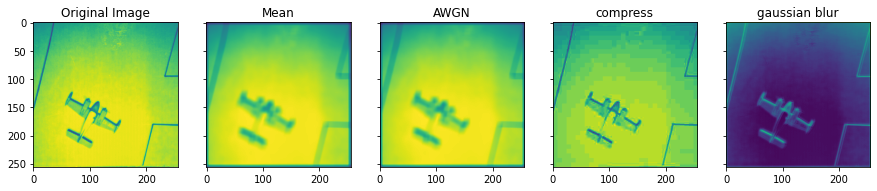

In [83]:
fig,ax = plt.subplots(1,5,sharex=True,sharey=True,figsize=(15,15))
ax[0].set_title('Original Image')
ax[0].imshow(img)
ax[1].set_title('Mean')
ax[1].imshow(img1_mean)
ax[2].set_title('AWGN')
ax[2].imshow(img1_awgn)
ax[3].set_title('compress')
ax[3].imshow(img1_compress)
ax[4].set_title('gaussian blur')
ax[4].imshow(img1_gauss)
plt.show()

In [87]:
for i in range(1,5):
  print(str(list_arr[i-1])+ ' MSE: ' + str(MSE(arr1[0],arr1[i])))
  print(str(list_arr[i-1])+ ' PSNR: ' + str(PSNR(arr1[0],arr1[i])))
  print(str(list_arr[i-1])+ ' SSIM: ' + str(SSIM(arr1[0],arr1[i])[0]))
  

mean MSE: 375.206350951478
mean PSNR: 22.388101799886066
mean SSIM: 0.7926708435406615
awgn MSE: 375.206350951478
awgn PSNR: 22.388101799886066
awgn SSIM: 0.34241282214847935


<ipython-input-86-810907cd671c>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum_msme += (img1[i,j]-img2[i,j])**2


compress MSE: 33596.87811279297
compress PSNR: 2.867814370905016
compress SSIM: 0.44072307881863626
gaussian blur MSE: 8497066.329395177
gaussian blur PSNR: -21.16188647567323
gaussian blur SSIM: -0.014003054446455335


Human score: mean : 0.5
             awgn: 0.4
             compress: 0.7
             gauss: 0.2

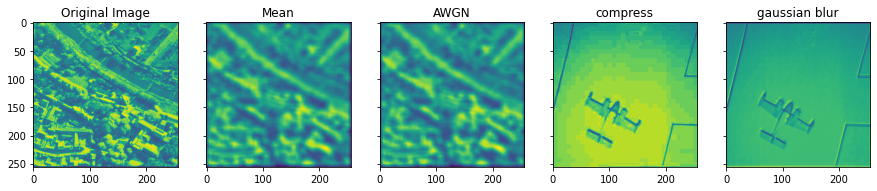

In [88]:
fig,ax = plt.subplots(1,5,sharex=True,sharey=True,figsize=(15,15))
ax[0].set_title('Original Image')
ax[0].imshow(img2)
ax[1].set_title('Mean')
ax[1].imshow(img2_mean)
ax[2].set_title('AWGN')
ax[2].imshow(img2_awgn)
ax[3].set_title('compress')
ax[3].imshow(img2_compress)
ax[4].set_title('gaussian blur')
ax[4].imshow(img2_gauss)
plt.show()

In [90]:
for i in range(1,5):
  print(str(list_arr[i-1])+ ' MSE: ' + str(MSE(arr2[0],arr2[i])))
  print(str(list_arr[i-1])+ ' PSNR: ' + str(PSNR(arr2[0],arr2[i])))
  print(str(list_arr[i-1])+ ' SSIM: ' + str(SSIM(arr2[0],arr2[i])[0]))


mean MSE: 995.1330264544636
mean PSNR: 18.15199221033231
mean SSIM: 0.047392082683314594
awgn MSE: 995.1330264544636
awgn PSNR: 18.15199221033231
awgn SSIM: 0.149848749632521


<ipython-input-86-810907cd671c>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum_msme += (img1[i,j]-img2[i,j])**2


compress MSE: 29781.115158081055
compress PSNR: 3.3913940492880243
compress SSIM: 0.04121534539445219
gaussian blur MSE: 1473526.0709684896
gaussian blur PSNR: -13.55277463320469
gaussian blur SSIM: -0.0018159137051789532


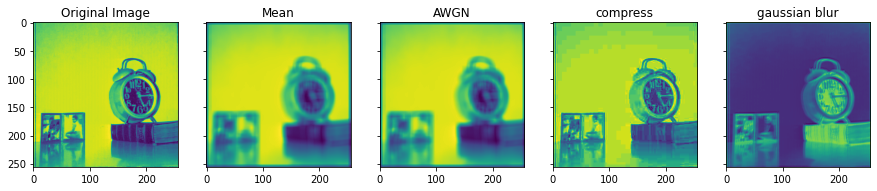

In [91]:
fig,ax = plt.subplots(1,5,sharex=True,sharey=True,figsize=(15,15))
ax[0].set_title('Original Image')
ax[0].imshow(img3)
ax[1].set_title('Mean')
ax[1].imshow(img3_mean)
ax[2].set_title('AWGN')
ax[2].imshow(img3_awgn)
ax[3].set_title('compress')
ax[3].imshow(img3_compress)
ax[4].set_title('gaussian blur')
ax[4].imshow(img3_gauss)
plt.show()

In [92]:
for i in range(1,5):
  print(str(list_arr[i-1])+ ' MSE: ' + str(MSE(arr3[0],arr3[i])))
  print(str(list_arr[i-1])+ ' PSNR: ' + str(PSNR(arr3[0],arr3[i])))
  print(str(list_arr[i-1])+ ' SSIM: ' + str(SSIM(arr3[0],arr3[i])[0]))

mean MSE: 709.3879252407116
mean PSNR: 19.62196568959163
mean SSIM: 0.5186907060142454
awgn MSE: 709.3879252407116
awgn PSNR: 19.62196568959163
awgn SSIM: 0.5772019231001916


<ipython-input-86-810907cd671c>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum_msme += (img1[i,j]-img2[i,j])**2


compress MSE: 25059.67674255371
compress PSNR: 4.141048963578489
compress SSIM: -0.010125426850807515
gaussian blur MSE: 17634874.975754958
gaussian blur PSNR: -24.332920241714817
gaussian blur SSIM: -0.004666694605275761
